In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering

seizure_df = pd.read_csv("Epileptic Seizure Recognition.csv")
seizure_df

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3


In [198]:
seizure_df.shape

(11500, 180)

In [199]:
seizure_df.dropna().shape

(11500, 180)

In [200]:
seizure_df['y']=seizure_df['y'].replace(to_replace=3,value= 2)
seizure_df['y']=seizure_df['y'].replace(to_replace=4,value= 2)
seizure_df['y']=seizure_df['y'].replace(to_replace=5,value= 2)

In [201]:
classification = seizure_df[["Unnamed","y"]]
df = seizure_df.copy()


In [202]:
seizure_df.drop(["y"],axis = 1,inplace = True)
seizure_df

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,168,164,150,146,152,157,156,154,143,129
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,20,15,16,12,5,-1,-18,-37,-47,-48
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-94,-65,-33,-7,14,27,48,77,117,170
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,114,121,135,148,143,116,86,68,59,55


In [203]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

seizure_df.Unnamed= le.fit_transform(seizure_df.Unnamed)

# Scale dataset, I will experiment with both MinMaxScaler and StandardScaler

In [204]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler().fit_transform(seizure_df)
df_min_max = pd.DataFrame(min_max)

In [205]:
df_min_max

,0,1,2,3,4,5,6,7,8,9,...,169,170,171,172,173,174,175,176,177,178
0,0.598487,0.553717,0.571107,0.584371,0.598207,0.599275,0.526728,0.486466,0.462484,0.464883,...,0.478116,0.507684,0.554390,0.544073,0.521051,0.489858,0.454331,0.434953,0.435612,0.474893
1,0.300896,0.624123,0.625176,0.620328,0.629447,0.637957,0.579905,0.551431,0.535948,0.536146,...,0.519068,0.557355,0.603836,0.603850,0.593542,0.562101,0.528396,0.505486,0.495495,0.522970
2,0.913210,0.506872,0.506618,0.506229,0.522997,0.531581,0.481668,0.457592,0.445752,0.451505,...,0.483491,0.527991,0.578064,0.570753,0.551440,0.515143,0.479717,0.456113,0.448331,0.478900
3,0.328463,0.486396,0.489158,0.492356,0.507087,0.514355,0.465155,0.445991,0.438693,0.450990,...,0.455593,0.489846,0.534612,0.527524,0.521051,0.494860,0.467417,0.446447,0.439322,0.471154
4,0.543178,0.513324,0.499296,0.491789,0.504194,0.517679,0.478310,0.468162,0.464837,0.467970,...,0.478628,0.513447,0.559485,0.550490,0.535296,0.507085,0.470557,0.443574,0.434022,0.469017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,0.609792,0.509677,0.511405,0.513024,0.526179,0.530372,0.479989,0.460686,0.453856,0.461796,...,0.481188,0.516465,0.563680,0.558595,0.547009,0.518199,0.482858,0.455590,0.445151,0.475694
11496,0.447430,0.502665,0.514503,0.527463,0.555973,0.583862,0.550798,0.535705,0.527582,0.523025,...,0.452009,0.494512,0.548996,0.552178,0.549858,0.525979,0.500131,0.485371,0.488606,0.533921
11497,0.921906,0.519776,0.519290,0.515855,0.529071,0.544273,0.499020,0.479247,0.462484,0.474402,...,0.465319,0.494512,0.544501,0.533941,0.525799,0.499861,0.479717,0.464734,0.457340,0.486378
11498,0.083746,0.504628,0.510560,0.516988,0.530229,0.540647,0.495102,0.474091,0.469804,0.479033,...,0.505247,0.545554,0.599341,0.604525,0.590693,0.550709,0.510076,0.483020,0.473238,0.503205


In [206]:
from sklearn.preprocessing import StandardScaler
stand_scal = StandardScaler().fit_transform(seizure_df)
df_stand_scaled = pd.DataFrame(stand_scal)


In [207]:
df_stand_scaled

,0,1,2,3,4,5,6,7,8,9,...,169,170,171,172,173,174,175,176,177,178
0,0.341139,0.885051,1.209929,1.462764,1.439539,1.242366,0.818262,0.380910,-0.014267,-0.163196,...,0.105907,-0.041630,-0.020282,-0.107131,-0.375743,-0.535944,-0.693858,-0.634144,-0.433290,-0.235399
1,-0.689657,2.400577,2.366190,2.239441,2.109257,2.037441,1.996033,1.941660,1.719102,1.546403,...,1.074264,1.057700,0.972841,0.943023,0.982911,1.018615,1.029295,1.023429,0.954241,0.856537
2,1.431276,-0.123287,-0.169154,-0.225131,-0.172743,-0.149016,-0.179743,-0.312756,-0.409056,-0.484131,...,0.233004,0.407820,0.455214,0.361582,0.193824,0.008151,-0.103237,-0.136872,-0.138593,-0.144405
3,-0.594169,-0.564057,-0.542530,-0.524794,-0.513803,-0.503073,-0.545472,-0.591462,-0.575607,-0.496475,...,-0.426689,-0.436417,-0.417531,-0.397851,-0.375743,-0.428321,-0.389414,-0.364021,-0.347337,-0.320328
4,0.149559,0.015586,-0.325731,-0.537025,-0.575814,-0.434746,-0.254129,-0.058825,0.041250,-0.089134,...,0.118012,0.085916,0.082040,0.005598,-0.108758,-0.165242,-0.316347,-0.431551,-0.470127,-0.368858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,0.380298,-0.062907,-0.066777,-0.078358,-0.104531,-0.173862,-0.216936,-0.238435,-0.217830,-0.237258,...,0.178534,0.152726,0.166305,0.147991,0.110762,0.073921,-0.030170,-0.149150,-0.212268,-0.217200
11496,-0.182091,-0.213856,-0.000533,0.233536,0.534181,0.925578,1.351359,1.563860,1.521707,1.231639,...,-0.511420,-0.333165,-0.128622,0.035263,0.164159,0.241335,0.371696,0.550714,0.794613,1.105255
11497,1.461399,0.154459,0.101845,-0.017202,-0.042521,0.111868,0.204582,0.207494,-0.014267,0.065162,...,-0.196704,-0.333165,-0.218906,-0.285123,-0.286748,-0.320698,-0.103237,0.065721,0.070150,0.025452
11498,-1.441819,-0.171590,-0.084843,0.007260,-0.017716,0.037330,0.117799,0.083625,0.158453,0.176255,...,0.747443,0.796533,0.882557,0.954889,0.929514,0.773473,0.603073,0.495462,0.438521,0.407630


# I will now use a dimentionality reduction method (KernelPCA was my first go but it don't like negative values). With the data set being non-linear, I used t-SNE 

In [190]:
#from sklearn.manifold import TSNE

#tsne = TSNE(n_components=3, perplexitddy=30.0, n_iter=1000).fit_transform(seizure_df)



In [194]:
#tsne_df = pd.DataFrame(data = tsne
   #          , columns = range(1,4))
#finalDf = pd.concat([tsne_df, df[['y']]], axis = 1)
#finalDf

,1,2,3,y
0,-15.840382,-1.142094,12.352345,2
1,2.457356,14.973786,16.361261,1
2,-2.614241,-4.334831,-20.523134,2
3,15.425454,0.553049,14.088678,2
4,-12.366544,-4.381135,19.080214,2
...,...,...,...,...
11495,-21.806875,-0.850995,14.505048,2
11496,4.907406,-2.393054,26.882740,1
11497,2.417089,2.278828,-22.627312,2
11498,12.278052,20.085991,-2.245099,2


# Try KernelPCA again

In [215]:
###Using MinMaxScaler

from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2,kernel = 'rbf',eigen_solver='dense')
reduced = kpca.fit_transform(df_min_max)


In [216]:
reducedDf = pd.DataFrame(data =reduced
             , columns = range(1,3))
finalDf = pd.concat([reducedDf, df[['y']]], axis = 1)
finalDf

,1,2,y
0,0.010650,0.002419,2
1,-0.020350,0.019522,1
2,0.043585,-0.000136,2
3,-0.018125,0.005278,2
4,0.004439,0.001447,2
...,...,...,...
11495,0.011576,-0.000982,2
11496,-0.005181,-0.012144,1
11497,0.044597,-0.000646,2
11498,-0.043955,0.002845,2


In [217]:
###Using StandardScaler

from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2,kernel ='rbf',eigen_solver='dense')
reduced = kpca.fir_transform(df_stand_scaled)

In [218]:
reducedDf = pd.DataFrame(data =reduced
             , columns = range(1,3))
finalDf_2 = pd.concat([reducedDf, df[['y']]], axis = 1)
finalDf_2

,1,2,y
0,0.016930,0.047383,2
1,0.725615,-0.023086,1
2,-0.144353,0.277545,2
3,-0.127296,0.457217,2
4,-0.218853,-0.012051,2
...,...,...,...
11495,-0.216922,-0.102665,2
11496,0.348529,-0.059356,1
11497,-0.189619,-0.124416,2
11498,-0.091244,0.227373,2


# Now for the actual modeling. I will be using SVM clustering due to the non-linear status of my data. K-means works well with linear sets but falls flat with they type of set I am using. 

In [230]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split

In [232]:
X_train, X_test, y_train, y_test = train_test_split(df_min_max,df['y'], test_size = 0.3, random_state = 4)

In [233]:
model = SVC(kernel = 'rbf')
model.fit(X_train,y_train)

SVC()

In [234]:
y_pred = model.predict(X_test)

In [238]:
print('Accuracy score of our model is ',accuracy_score(y_test, y_pred))


Accuracy score of our model is  0.9744927536231884


<AxesSubplot:>

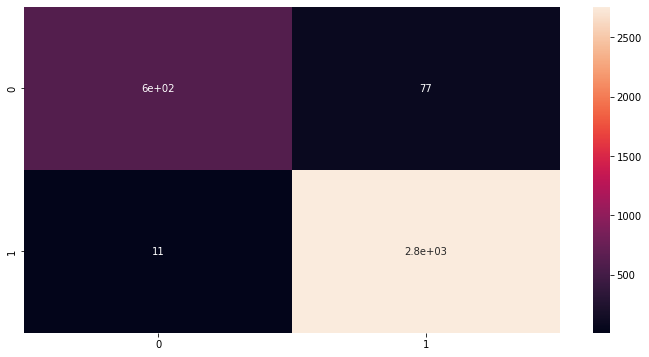

In [241]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels = [1, 2])
sns.heatmap(cnf_matrix, annot=True)

In [ ]:
y_pred = kmeans.fit_predict(df_max_min)
y_pred.shape

In [ ]:
pca = PCA(n_components=0.95)
pca_mdl = pca.fit_transform(df_max_min)
pca_df = pd.DataFrame(pca_mdl)

In [ ]:
sns.scatterplot(x = pca_df[0], y = pca_df[1],hue = y_pred)

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=1).fit(df_min_max)

In [ ]:
y_pred = kmeans.fit_predict(df_min_max)
y_pred.shape

In [ ]:
pca = PCA(n_components=0.95)
pca_mdl = pca.fit_transform(df_min_max)
pca_df = pd.DataFrame(pca_mdl)

In [ ]:
sns.scatterplot(x = pca_df[0], y = pca_df[1],hue = y_pred)

In [ ]:
y_df = pd.DataFrame(y_pred, columns=['Cluster'])
new_df = pd.concat([df, y_df], axis=1)
new_df

In [ ]:
one_df = new_df.loc[new_df['y'] == 1]

In [ ]:
one_df.Cluster.value_counts()